<a href="https://colab.research.google.com/github/dongspam0209/ML-DL_base/blob/main/HW02_ipynb_12191727_%EA%B9%80%EB%8F%99%ED%95%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HW02: Multi-Layer Perceptron and Gradient Descent

Following codes are training MLP for [dataset](https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/) using Keras.

In [ ]:
import os
import numpy as np
import pandas as pd
import time
import warnings

from sklearn.neural_network import MLPClassifier
import sklearn.metrics

from tensorflow import keras
import requests

In [ ]:
# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
sns.set('notebook', font_scale=1.25, style='whitegrid')

In [ ]:
dataset_URL = "https://raw.githubusercontent.com/tufts-ml-courses/cs135-23f-assignments/main/hw3/data_flower/"

In [ ]:
url = dataset_URL + "x_test.csv"
c = pd.read_csv(url, on_bad_lines='skip')

In [ ]:
# Load training data
train_input = pd.read_csv(dataset_URL + 'x_train.csv', skiprows=1, delimiter=',').to_numpy()
train_target = pd.read_csv(dataset_URL + 'y_train.csv', skiprows=1, delimiter=',').to_numpy()

# Load test data
test_input = pd.read_csv(dataset_URL + 'x_test.csv', skiprows=1, delimiter=',').to_numpy()
test_target = pd.read_csv(dataset_URL + 'y_test.csv', skiprows=1, delimiter=',').to_numpy()

assert train_input.shape[0] == train_target.shape[0]
assert test_input.shape[0] == test_target.shape[0]

train_target = train_target.flatten()
test_target = test_target.flatten()

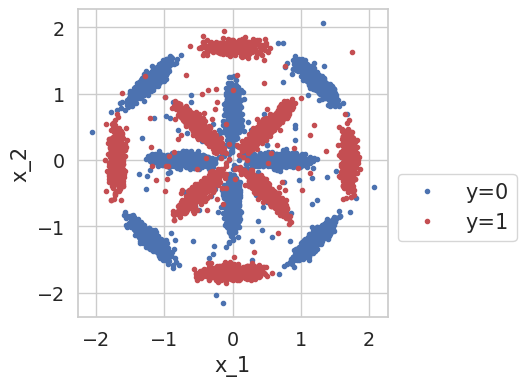

In [ ]:
fig, _ = plt.subplots(figsize=(4,4));
plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0');
plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1');
plt.legend(bbox_to_anchor=[1.0, 0.5], fontsize=15);
plt.xlabel('x_1'); plt.ylabel('x_2');

In [ ]:
from tensorflow import keras

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(16, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                48        
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dense_7 (Dense)             (None, 1)                 17        
                                                                 
Total params: 1137 (4.44 KB)
Trainable params: 1137 (4.44 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [ ]:
history = model.fit(train_input, train_target,
          validation_data = (test_input, test_target),
          epochs=15, batch_size = 32, verbose = 0)

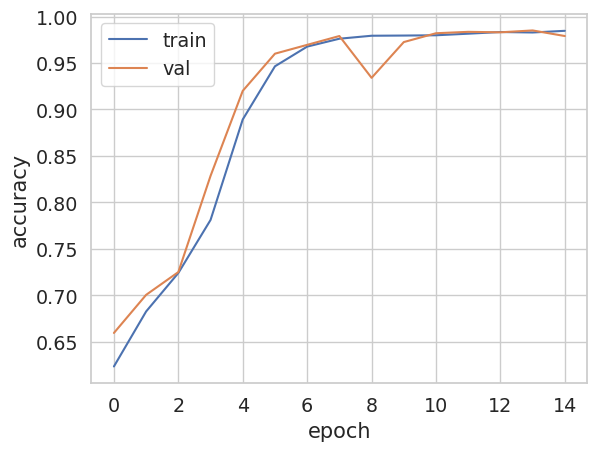

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

## Visualize the output

In [ ]:
def visualize_network(model, train_input, train_target):
  # -1에서 1 사이의 균일한 값 생성
  num_points = 100  # 원하는 점의 개수
  x = np.linspace(-2, 2, num_points)
  y = np.linspace(-2, 2, num_points)

  # 2D 그리드 생성
  xx, yy = np.meshgrid(x, y)

  # 2D 그리드를 하나의 numpy array로 변환
  data = np.vstack([xx.ravel(), yy.ravel()]).T

  res = model.predict(data)

  plt.figure(figsize=(10, 8))
  plt.scatter(data[:, 0], data[:, 1], c=res[:, 0], cmap='coolwarm', alpha=0.7)
  plt.plot(train_input[(train_target == 0).flatten(), 0], train_input[(train_target == 0).flatten(), 1], 'b.', label='y=0');
  plt.plot(train_input[(train_target == 1).flatten(), 0], train_input[(train_target == 1).flatten(), 1], 'r.', label='y=1');
  plt.colorbar(label='Result Value')
  plt.xlabel('X Coordinate')
  plt.ylabel('Y Coordinate')
  plt.title('Scatter plot with color representing result value')
  plt.show()

313/313 [==============================] - 0s 1ms/step


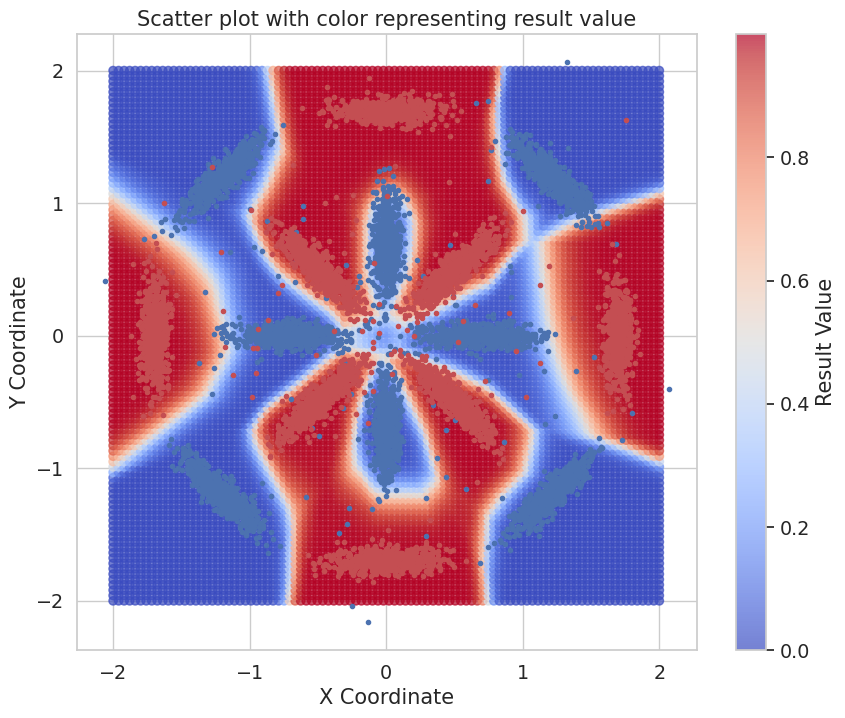

In [ ]:
visualize_network(model, train_input, train_target)

## Task 1: Deep Neural Network

Make a network with only a single layer, train it, and visualize using `visualize_network`.

How does it look? Explain why.

How can we change the structure of the network?


313/313 [==============================] - 0s 1ms/step


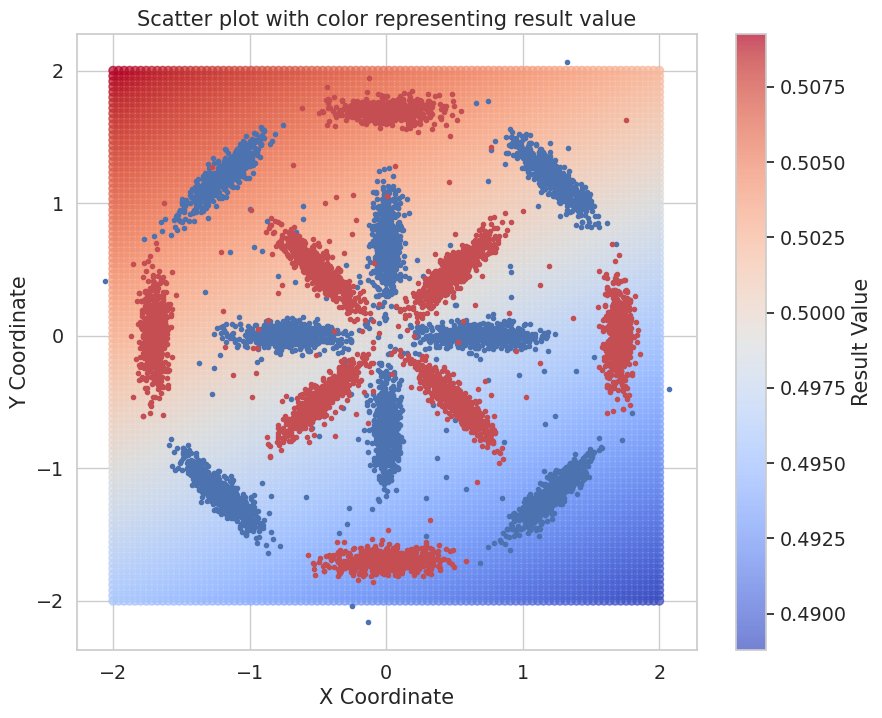

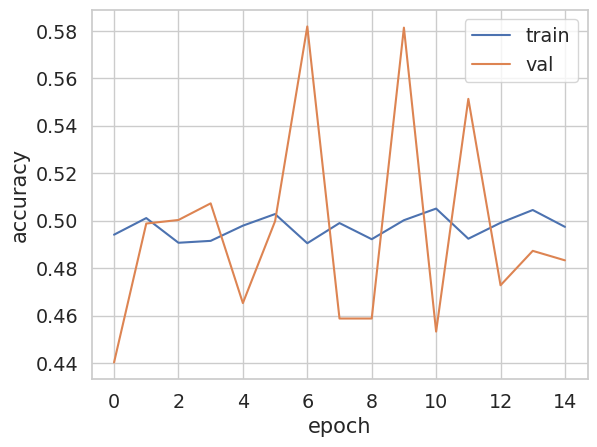

In [ ]:
# define model
model_kdh = keras.Sequential()
model_kdh.add(keras.layers.Dense(1, activation='sigmoid', input_shape=(2,)))

# model_kdh.summary()

model_kdh.compile(loss='binary_crossentropy', metrics='accuracy', optimizer=keras.optimizers.SGD(learning_rate=0.05))

# train
history = model_kdh.fit(train_input, train_target,
          validation_data = (test_input, test_target),
          epochs=15, batch_size = 32, verbose = 0)

# visualize
visualize_network(model_kdh, train_input, train_target)


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

## Answer 1
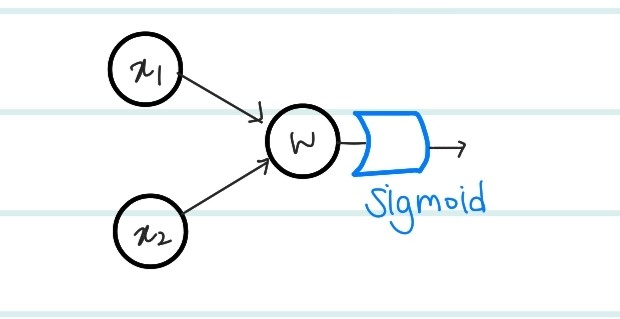


위는 코드를 간단하게 그림으로 나타낸 것이다. input으로 2개의 특성이 들어가고, weight parameter와 곱해서 sigmoid 를 통해 추론 결과가 나온다. 비선형성을 띈 모델을 구축하기 위해선 layer가 두개이상은 되어야한다. 위를 수식으로 나타내면 간단하게

sigmoid($x_1\times x_2\times w$) (sigmoid(z)=$\frac 1 {1+e^{-z}}$) 이기 때문에, 사실상 선형적으로 동작한다는 것을 알 수 있다. 따라서 accuracy도 plot 해본 결과 학습을 진행해도 증가하지 않는 것을 확인 할 수 있다.

## Task 2: Forward Pass Method

Implement the forward pass of the exact same network.

| Layer (type)  | Output Shape | Param # |
|---------------|---------------|---------|
| dense (Dense) | (None, 16)    | 48      |
| dense_1 (Dense)| (None, 32)   | 544     |
| dense_2 (Dense)| (None, 16)   | 528     |
| dense_3 (Dense)| (None, 1)    | 17      |


## Task 3: Training the Neural Network

Implement the training of **the same** network as in the Keras example.

Basic settings are given as follows, but feel free to modify:

* Loss function: binary cross-entropy
* Optimizer: SGD with learning rate 0.05
* Epochs: 15
* Batch size: 32

### Important Notes:

* Implement the training of the network by finishing the skeleton code below.
* **Do not** use ML libraries such as Keras or PyTorch.
* Only **NumPy functions** are allowed.
* Make comments detailed. They will be considered as part of the report.
* Never cheat by using AI tools like Gemini or ChatGPT to do your homework.


In [ ]:
## Skeleton code
import numpy as np

from numpy.random import randn

np.random.seed(99)

class flowerNet():
  def __init__(self):
    # batch N, D_in → H_1 → H_2 → H_3 → D_out
    self.N=32 # 배치사이즈
    self.D_in=2 # 처음 input으로 들어가는 dimension
    self.H_1=16 # 첫번째 layer의 노드 수
    self.H_2=32 # 두번째 layer의 노드 수
    self.H_3=16 # 세번째 layer의 노드 수
    self.D_out=1 # 마지막 출력 layer의 노드 수
    self.learning_rate=0.05 # learning rate
    self.epochs=15 # epoch 수

    #weight initial
    self.w1=randn(self.D_in,self.H_1) # 초기 가중치 초기화 input layer에서 첫번째 hidden layer로 넘어갈때의 가중치 초기화. XW1+b1 의 W1 [input층의 노드 수, 첫번째 layer의 노드 수]
    self.w2=randn(self.H_1,self.H_2) # 초기 가중치 초기화 첫번째 hidden layer에서 두번째 hidden layer로 넘어갈때의 가중치 초기화 H1W2+b2 의 W2 [첫번째 layer의 노드 수, 두번째층의 노드 수]
    self.w3=randn(self.H_2,self.H_3) # 초기 가중치 초기화 두번째 hidden layer에서 세번째 hidden layer로 넘어갈때의 가중치 초기화 H2W3+b3 의 W3 [두번째 layer의 노드 수, 세번째층의 노드 수]
    self.w4=randn(self.H_3,self.D_out) # 초기 가중치 초기화 세번째 layer에서 마지막 output layer로 넘어갈때의 가중치 초기화 H3W4+b4 의 W4 따라서 [세번째 layer의 노드 수, output층의 노드 수]

    #bias initial
    #bias는 weight와 다르게, (1,)형태를 가진다 그 이유는, numpy의 특성으로, ex) XW1+b1 계산시, [32,2]●[2,16]의 결과인, [32,16]의 모든 행 즉, [0][16] , [1][16], [2][16]... 모두에 같은 bias값을 더해줘야하는데,
    #numpy이기 때문에, [1,16]으로 더하면 모든 행에 더할 수 있기 때문에 [1,16]으로 초기화한다. 또한, weight와 다르게 bias값은 초기에 0으로 초기화한다. 아래는 bias의 shape이다.
    self.bias1=np.zeros((1,self.H_1))  # [1,16]
    self.bias2=np.zeros((1,self.H_2)) # [1,32]
    self.bias3=np.zeros((1,self.H_3)) # [1,16]
    self.bias4=np.zeros((1,self.D_out)) # [1,1]

    pass    # TODO

  def predict(self, x): # feed forward를 구현한 predict함수이다.
   #np.maximum은 relu연산으로, 0보다 큰값이 인자로 들어가면, 그 값을, 0보다 작거나 같은 값이 들어가면 0으로 output을 가지는 activation 함수이다. 이를 통해 비선형층을 구현할 수 있다.
    self.h_1= np.maximum(0,np.dot(x,self.w1)+self.bias1) # 제일 처음 input으로 x input과 weight_1 의 내적값과 bias_1 을 더해서 Xw_1+b_1을 구현한뒤, 이를 relu를 지나게끔 한다.
    self.h_2= np.maximum(0,np.dot(self.h_1,self.w2)+self.bias2) #첫번째 활성화함수 층을 지난 값 h_1 에 두번째 weight_2를 내적한뒤, bias_2를 더하고 다시 relu를 지나게 해서 h_2를 output으로 가진다.
    self.h_3= np.maximum(0,np.dot(self.h_2,self.w3)+self.bias3) # h_2에 weight_3을 내적한뒤, bias_3을 더하고 또 relu를 지나 h_3값을 output으로 가진다.
    self.z= np.dot(self.h_3,self.w4)+self.bias4 # 마지막 activation 함수는 sigmoid 함수이기 때문에, sigmoid 입력되기 전의 값을 따로 z로 할당했다. h_3w_4+b_4 의 값이다.

    y_pred=1/(1+np.exp(-self.z)) # sigmoid 함수를 수식으로 나타낸 값이다. z를 sigmoid에 입력해 최종output으로 predict값을 도출한다.

    return y_pred # y_pred : (32,1) h_3: (32,16) h_2 : (32,32) h_1: (32,16)

    pass    # TODO

  def train(self, x, y_target):
    print("Training")
    loss_plot=[] #loss를 matplotlib으로 plot해보기 위한 변수 list이다.
    for epoch in range(self.epochs): # epoch횟수만큼 train한다.

            # epoch에서의 batch마다 가져오는 sample들이 달라져야하기 때문에, seed값을 epoch 값으로 줬다.
            np.random.seed(epoch)
            indices = np.arange(len(x))
            np.random.shuffle(indices)
            x = x[indices]
            y_target = y_target[indices]

            print(f"epoch :{epoch}")
            for i in range(0,len(x),self.N): # 32 배치사이즈를 의미한다.
              x_batch=x[i:i+self.N]  # [32,2]
              y_batch=y_target[i:i+self.N] # [32,1]

              y_batch=np.array(y_batch).reshape(-1,1) # np.array reshape을 하지 않으면, 32,32가 되어서 학습이 진행되지않아 -1,1로 축값을 맞춰주었다.

              y_pred=self.predict(x_batch) # y_pred : (32,1) h_3: (32,16) h_2 : (32,32) h_1: (32,16)


              # binary cross entropy loss
              loss = -((y_batch * np.log(y_pred+1e-7) + (1 - y_batch) * np.log(1 - y_pred+1e-7)).mean()) # binary cross entropy loss를 의미하고, y_pred나 1-y_pred가 0에 너무 가까워지는 값이 되면 log값이 infinite해지기 때문에 1e-7를 더해주었다.

              m = x.shape[0] # 배치사이즈로 정규화한다.
              grad_y_pred= y_pred-y_batch
              #binary cross entropy 의 loss함수를 가지며 마지막 output layer activation 함수가 sigmoid 함수를 사용하게 되면, sigmoid 입력 직전에서의 편미분값을 위의 식으로 구할 수 있다.
              # dL/dy_pred= -y/y_pred + 1-y/(1-y_pred)
              # dL/dz (z는 sigmoid 입력될때 시점의 값) = dy_pred/dz * dL/dy_pred= y_pred(1-y_pred) * (y_pred-y*y_pred-y+y*y_pred)/(y_pred(1-y_pred))  = y_pred-y

              # h_3*w_4
              grad_w4=np.dot(self.h_3.T,grad_y_pred)/m #dL/dw4=dz/db4*dL/dz
              grad_h3=np.dot(grad_y_pred,self.w4.T)*(self.h_3>0) #relu의 미분 과정에서, 해당 output이였던 h의 값이 0보다 클 시에만, 이전의 gradient를 이어서 전달하고, 0보다 작거나 같은값은 0으로 처리하기 위해서 self.h_3>0을 추가했다.
              grad_b4=np.sum(grad_y_pred,axis=0,keepdims=True)/m #bias는 역전파에서 이전 활성화 값에 대한 손실의 기울기의 합으로 주어지기 때문에 np.sum으로 이전 기울기인 grad_y_pred의 합을 구해서 기울기를 구했다. 아래의 두 layer도 마찬가지 방법으로 back propagation을 진행했다.

              # h_2*w_3
              grad_w3=np.dot(self.h_2.T,grad_h3)/m
              grad_h2=np.dot(grad_h3,self.w3.T)*(self.h_2>0)
              grad_b3=np.sum(grad_h3,axis=0,keepdims=True)/m

              # h_1*w_2
              grad_w2=np.dot(self.h_1.T,grad_h2)/m
              grad_h1=np.dot(grad_h2,self.w2.T)*(self.h_1>0)
              grad_b2=np.sum(grad_h2,axis=0,keepdims=True)/m

              # x_batch*w_1
              grad_w1=np.dot(x_batch.T,grad_h1)/m
              grad_b1=np.sum(grad_h1,axis=0,keepdims=True)/m

              # stochastic gradient descent 알고리즘에 따라서 learning rate를 곱한 값 만큼, weight와 bias를 양의 기울기가 나오면 음의 값으로, 음의 기울기가 나오면 양의 값으로 update하는 방향으로 진행한다.
              self.w1 -= self.learning_rate * grad_w1
              self.w2 -= self.learning_rate * grad_w2
              self.w3 -= self.learning_rate * grad_w3
              self.w4 -= self.learning_rate * grad_w4

              self.bias4 -= self.learning_rate * grad_b4
              self.bias3 -= self.learning_rate * grad_b3
              self.bias2 -= self.learning_rate * grad_b2
              self.bias1 -= self.learning_rate * grad_b1

            print(loss)
            loss_plot.append(loss)
    return loss_plot
    pass    # TODO

In [ ]:
# define model
myModel = flowerNet()

In [ ]:
# accuracy before training
y= myModel.predict(train_input)

print(f'Training accuracy: {np.sum((y > 0.5).flatten() == train_target) / len(train_target)}')

y = myModel.predict(test_input)
print(f'Validation accuracy: {np.sum((y > 0.5).flatten() == test_target) / len(test_target)}')

Training accuracy: 0.5062506250625063
Validation accuracy: 0.5027513756878439


In [ ]:
# training example
history=myModel.train(train_input,train_target)


Training
epoch :0
1.454204831767207
epoch :1
0.6423167041388961
epoch :2
0.8102974981166129
epoch :3
0.40008119938928616
epoch :4
0.3268269068972709
epoch :5
0.43982492474191015
epoch :6
0.26121051613604757
epoch :7
0.4334024090224002
epoch :8
0.297004551576685
epoch :9
0.23439793674993456
epoch :10
0.24836777595590845
epoch :11
0.23178100871325683
epoch :12
0.2672867446648389
epoch :13
0.26241930104570116
epoch :14
0.36541796740336796


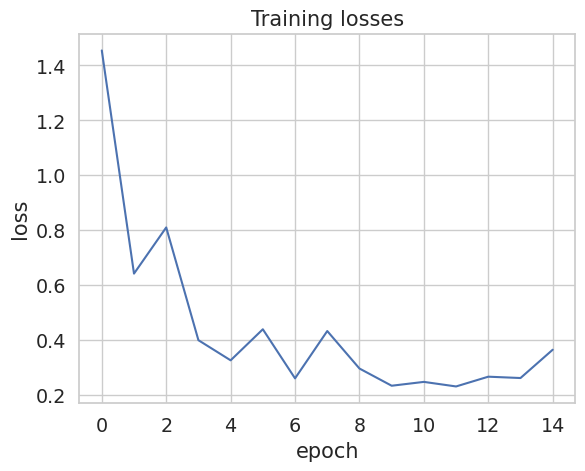

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history)
# 그래프 설정
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training losses')
plt.show()

In [ ]:
# accuracy after training
y = myModel.predict(train_input)

print(f'Training accuracy: {np.sum((y > 0.5).flatten() == train_target) / len(train_target)}')

y= myModel.predict(test_input)
print(f'Validation accuracy: {np.sum((y > 0.5).flatten() == test_target) / len(test_target)}')

Training accuracy: 0.8914891489148915
Validation accuracy: 0.887943971985993


## A. Explanation of codes.

* x

### Acknowledgement

Data set from
https://www.cs.tufts.edu/comp/135/2023f/hw3.html



